In [36]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import f1_score

In [12]:
cleaned_data = pd.read_csv("dataset/cleaned_data2.csv")

In [13]:
cleaned_data.head(5)

,reviewerID,reviewText,clean_reviewText,clean_summary,rating_class
0,A1BZ18U2EF4FAI,the nook color is a great tablet. it sometimes...,nook color great tablet sometimes slow still t...,good,good
1,A3W2CJFXG0158G,"1. I have a iPhone3Gs with a case, the cable w...",phone is case win without remove case manage p...,first belkin disappointment,bad
2,A3F9CBHV4OHFBS,I needed this cable to connect my Epson projec...,need connect elson project lawton great price ...,great product especially price,good
3,AZHV16QDXACKC,i bought these over a year ago hoping that a c...,year ago hop company offer lifetime warranty p...,not great,bad
4,A231WM2Z2JL0U3,or those who shun manuals. I am a fairly compu...,shun manual fairly computer-navvy person hande...,not faint-hearted,bad


In [14]:
cleaned_data["rating_class"] = cleaned_data["rating_class"].apply(lambda x: 1 if x=="good" else 0)

In [15]:
cleaned_data.head(5)

,reviewerID,reviewText,clean_reviewText,clean_summary,rating_class
0,A1BZ18U2EF4FAI,the nook color is a great tablet. it sometimes...,nook color great tablet sometimes slow still t...,good,1
1,A3W2CJFXG0158G,"1. I have a iPhone3Gs with a case, the cable w...",phone is case win without remove case manage p...,first belkin disappointment,0
2,A3F9CBHV4OHFBS,I needed this cable to connect my Epson projec...,need connect elson project lawton great price ...,great product especially price,1
3,AZHV16QDXACKC,i bought these over a year ago hoping that a c...,year ago hop company offer lifetime warranty p...,not great,0
4,A231WM2Z2JL0U3,or those who shun manuals. I am a fairly compu...,shun manual fairly computer-navvy person hande...,not faint-hearted,0


In [16]:
Y = cleaned_data["rating_class"]
X = cleaned_data["clean_reviewText"]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True, stratify = Y)

In [18]:
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train.values.astype("U"))
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test.values.astype("U"))
tfidf_vect_test = tfidf_vect_test.toarray()

In [39]:
model = XGBClassifier(n_estimators=300, learning_rate =0.20, max_depth = 30,min_child_weight= 5,gamma = 0.5,colsample_bytree = 0.4)
t0 = time.time()
eval_s = [(tfidf_vect_train, Y_train), (tfidf_vect_test, Y_test)]
model.fit(tfidf_vect_train, Y_train, eval_metric=["error"], verbose=True, eval_set = eval_s, early_stopping_rounds=20)
t1 = time.time()
xg_Ypred = model.predict(tfidf_vect_test)
t2 = time.time()
xg_time_linear_train = t1-t0
xg_time_linear_predict = t2-t1
xg_f1Score = f1_score(Y_test, xg_Ypred, average = "weighted")

[0]	validation_0-error:0.25375	validation_1-error:0.317
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.20325	validation_1-error:0.289
[2]	validation_0-error:0.184	validation_1-error:0.296
[3]	validation_0-error:0.1695	validation_1-error:0.288
[4]	validation_0-error:0.14975	validation_1-error:0.272
[5]	validation_0-error:0.142	validation_1-error:0.266
[6]	validation_0-error:0.14375	validation_1-error:0.253
[7]	validation_0-error:0.1325	validation_1-error:0.254
[8]	validation_0-error:0.127	validation_1-error:0.242
[9]	validation_0-error:0.117	validation_1-error:0.255
[10]	validation_0-error:0.112	validation_1-error:0.255
[11]	validation_0-error:0.1045	validation_1-error:0.252
[12]	validation_0-error:0.09775	validation_1-error:0.253
[13]	validation_0-error:0.093	validation_1-error:0.251
[14]	validation_0-error:0.08875	validation_1-error:0.249
[15]	vali

In [40]:
print("Training time: %fs; Prediction time: %fs" % (xg_time_linear_train, xg_time_linear_predict))

Training time: 155.657040s; Prediction time: 0.547644s


In [41]:
xg_f1Score

0.7869639969154787

In [19]:
model = CatBoostClassifier(iterations=300, learning_rate=0.1, max_depth = 8)
t0 = time.time()
model.fit(tfidf_vect_train, Y_train)
t1 = time.time()
cat_Ypred = model.predict(tfidf_vect_test)
t2 = time.time()
cat_time_linear_train = t1-t0
cat_time_linear_predict = t2-t1
cat_f1Score = f1_score(Y_test, cat_Ypred, average = "weighted")

0:	learn: 0.6745708	total: 371ms	remaining: 1m 50s
1:	learn: 0.6610382	total: 790ms	remaining: 1m 57s
2:	learn: 0.6480858	total: 1.09s	remaining: 1m 48s
3:	learn: 0.6361605	total: 1.41s	remaining: 1m 44s
4:	learn: 0.6231623	total: 1.72s	remaining: 1m 41s
5:	learn: 0.6145025	total: 2.03s	remaining: 1m 39s
6:	learn: 0.6053007	total: 2.33s	remaining: 1m 37s
7:	learn: 0.5961403	total: 2.65s	remaining: 1m 36s
8:	learn: 0.5892206	total: 2.95s	remaining: 1m 35s
9:	learn: 0.5833317	total: 3.25s	remaining: 1m 34s
10:	learn: 0.5780788	total: 3.55s	remaining: 1m 33s
11:	learn: 0.5726296	total: 3.85s	remaining: 1m 32s
12:	learn: 0.5688342	total: 4.16s	remaining: 1m 31s
13:	learn: 0.5639662	total: 4.46s	remaining: 1m 31s
14:	learn: 0.5595987	total: 4.77s	remaining: 1m 30s
15:	learn: 0.5560822	total: 5.08s	remaining: 1m 30s
16:	learn: 0.5529659	total: 5.4s	remaining: 1m 29s
17:	learn: 0.5469982	total: 5.74s	remaining: 1m 29s
18:	learn: 0.5426066	total: 6.08s	remaining: 1m 29s
19:	learn: 0.5400331	to

In [20]:
print("Training time: %fs; Prediction time: %fs" % (cat_time_linear_train, cat_time_linear_predict))

Training time: 142.943628s; Prediction time: 1.319339s


In [21]:
cat_f1Score

0.781999127996512

In [23]:
model = svm.SVC(kernel='rbf')
t0 = time.time()
model.fit(tfidf_vect_train, Y_train)
t1 = time.time()
svc_Ypred = model.predict(tfidf_vect_test)
t2 = time.time()
svc_time_linear_train = t1-t0
svc_time_linear_predict = t2-t1
svc_f1Score = f1_score(Y_test, svc_Ypred, average = "weighted")

In [24]:
print("Training time: %fs; Prediction time: %fs" % (svc_time_linear_train, svc_time_linear_predict))

Training time: 151.053635s; Prediction time: 37.213420s


In [25]:
svc_f1Score

0.8239887352790578

In [42]:
f1_scores = [svc_f1Score, cat_f1Score, xg_f1Score]
train_time = [svc_time_linear_train, cat_time_linear_train, xg_time_linear_train]
predict_time = [svc_time_linear_predict, cat_time_linear_predict, xg_time_linear_predict]
algo_name = ["SVC", "CatBoost", "XGBoost"]

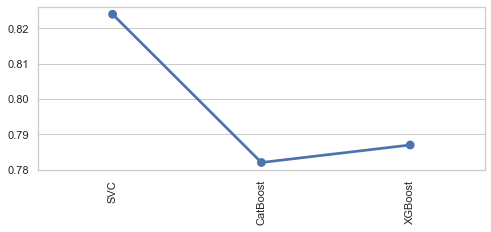

In [57]:
f1_scores = [svc_f1Score, cat_f1Score, xg_f1Score]
train_time = [svc_time_linear_train, cat_time_linear_train, xg_time_linear_train]
predict_time = [svc_time_linear_predict, cat_time_linear_predict, xg_time_linear_predict]
algo_name = ["SVC", "CatBoost", "XGBoost"]

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
sns.set_theme(style = "whitegrid")
ax = sns.pointplot(x = algo_name, y = f1_scores)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 90)
plt.show()

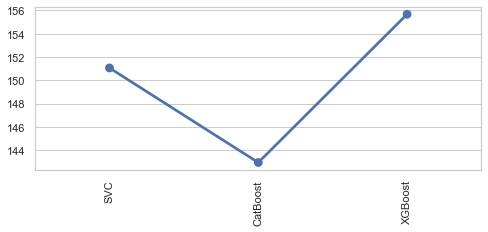

In [56]:
plt.figure(figsize=(8,3))
sns.set_theme(style = "whitegrid")
bx = sns.pointplot(x = algo_name, y = train_time)
bx.set_xticklabels(ax.get_xticklabels() , rotation = 90)
plt.show()

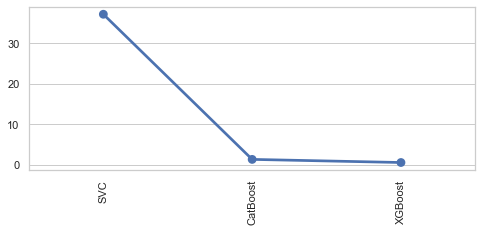

In [55]:
plt.figure(figsize=(8,3))
sns.set_theme(style = "whitegrid")
cx = sns.pointplot(x = algo_name, y = predict_time)
cx.set_xticklabels(ax.get_xticklabels() , rotation = 90)
plt.show()